# Walmart sales data - EDA

The EDA is on 45 Walmart stores in geographically diverse locations. The data collection includes historical data from 2010-02-05 to 2012-11-01 containing revenue information. The aim of this project is to assess the collection of Walmart Sales Data to estimate department-wise revenues for each of their stores,appreciate the influence of multiple distribution factors and a better analysis of the sales trend.The scope of the project is to understand and evaluate which store type improves the sale scale.

## Imports

First of all, let's import the required packages.

In [1]:
#importing packages required for the analysis

import pandas as pd
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#import missingno as msno
from matplotlib import gridspec
import scipy
from scipy import stats
from scipy.special import boxcox1p
matplotlib.use('TkAgg')
%matplotlib inline

## Loading data

In [2]:
#fetching data

odf = pd.read_csv('data.csv')
fdf = pd.read_csv('features.csv')
sdf = pd.read_csv('stores.csv')

In [3]:
odf.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
fdf.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
sdf.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


We can see that 'data.csv' file gives information about the weekly sales across the different stores, 'features.csv' provides how various indices and metrics varied for these stores across the weeks and 'stores.csv' gives the type and size of these stores.

## Analysing the type and size of stores

In [6]:
sdf.shape

(45, 3)

Assuming that there are no duplicate entries in the table, we can see that we have the data for 45 stores. Let's cross verify before proceeding further.

In [7]:
sdf['Store'].nunique()

45

So we have 45 unique stores. Let's see the number of stores under the different types.

<AxesSubplot:title={'center':'Number of stores in different types'}, xlabel='Type', ylabel='count'>

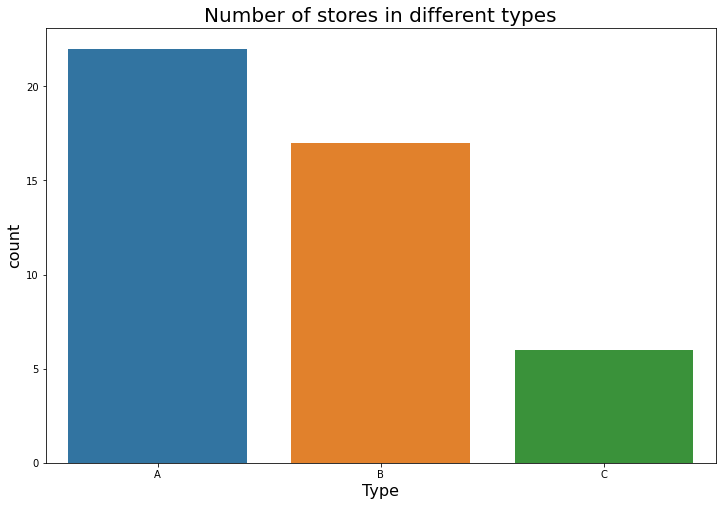

In [8]:
plt.figure(figsize=(12,8))
plt.title('Number of stores in different types', fontsize=20)
plt.xlabel('',fontsize=16)
plt.ylabel('',fontsize=16)
sns.countplot(x='Type', data=sdf)

In [9]:
sdf.groupby('Type').size()

Type
A    22
B    17
C     6
dtype: int64

We can see that there are 22 stores of type A, 17 of type B and 6 of type C. Now let's see how the size varies across the different type of stores.

<AxesSubplot:title={'center':'Size vs Type of store'}, xlabel='Type', ylabel='Size'>

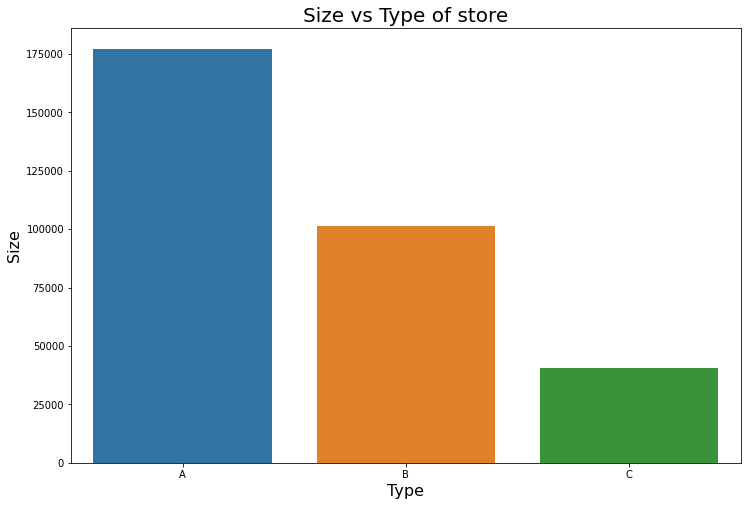

In [10]:
plt.figure(figsize=(12,8))
plt.title('Size vs Type of store', fontsize=20)
plt.xlabel('',fontsize=16)
plt.ylabel('',fontsize=16)
sns.barplot(data = sdf.groupby('Type')['Size'].mean().reset_index(), x='Type', y='Size')

It can be observed soze of A > B > C. We can infer that the classification has been done on the basis of the store size.

Type A stores have an average size of about 1.75 lakhs units, type B around 1 lakh units and type C below 50k units

## Overall sales across all stores

Let's merge the dataframes so that we can do more detailed analysis on the sales patterns.

In [11]:
#Merging the dataframes

intersection_columns = ['Store', 'Date', 'IsHoliday']

df = pd.merge(odf, fdf, how='left', left_on=intersection_columns, right_on=intersection_columns)

In [12]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [13]:
#Merging the dataframes

intersection_columns = ['Store']

df = pd.merge(df, sdf, how='left', left_on=intersection_columns, right_on=intersection_columns)

In [14]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


Let's try to visualise how the overall sales across the entries set of stores varied in the different weeks of the year. Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. 

In [15]:
#Converting the time data (timestamp)in identifiers that allows for greater ease in data manipulation.

df['week'] = pd.to_datetime(df.Date).dt.isocalendar().week
df['year'] = pd.to_datetime(df.Date).dt.isocalendar().year

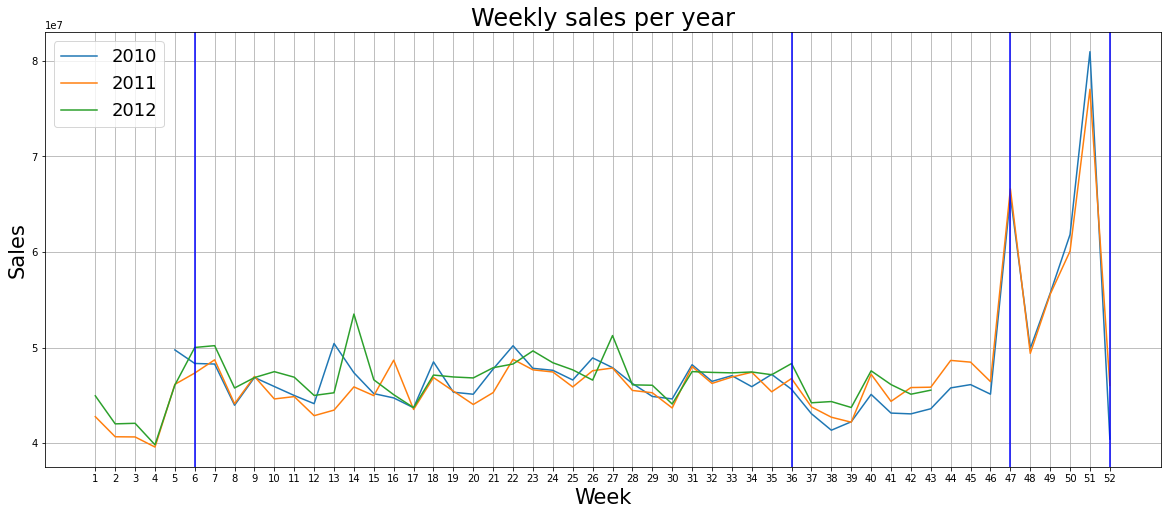

In [16]:
#Ploting the volume of weekly sales indicating the week the holiday occurs with a blue line
plt.figure(figsize=(20,8))
for year in df.year.unique():
    var = df[df.year==year]['Weekly_Sales'].groupby(df['week']).sum()
    sns.lineplot(var.index, var.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(df.year.unique(), loc='best', fontsize=18)
plt.title('Weekly sales per year', fontsize=24)
plt.ylabel('Sales', fontsize=21)
plt.xlabel('Week', fontsize=21)
for value in df[df.IsHoliday].week.unique():
    plt.axvline(value, color='blue')
plt.show()

**There are a few conclusions that can be drawn at this point**

* In a general sense, the sales patterns have shown a similar behaviour in all the three years.
* There is a significant spike in the sales in the last few weeks of the year which is the Christmas season.
* Sales usually hit the lowest in the weeks following the year end peak season.

These are general patterns. A more detailed analysis on how the sales varies across the different types of stores can provide further insights.

## Analysing at the type of store level

Before proceeding further, let's check whether we have any missing data.

In [17]:
fdf.shape

(8190, 12)

In [18]:
fdf.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

There are lot of missing values among the markdown variables. There are some missing values in the 'CPI' and 'Unemployment' features, but we have data in most of the rows.

First of all, let's see how the average weekly sales vary across the three different store types.

In [19]:
#function to plot the variation of metrics across different store types

def plotter(col, title, ylabel):
    plt.figure(figsize=(20,8))
    for type_ in df.Type.unique():
        var = df[df.Type==type_][col].groupby(df['week']).median()
        sns.lineplot(var.index, var.values)
    plt.grid()
    plt.xticks(np.arange(1, 53, step=1))
    plt.legend(df.Type.unique(), loc='best', fontsize=18)
    plt.title(title, fontsize=24)
    plt.ylabel(ylabel, fontsize=21)
    plt.xlabel('Week', fontsize=21)
    plt.show()

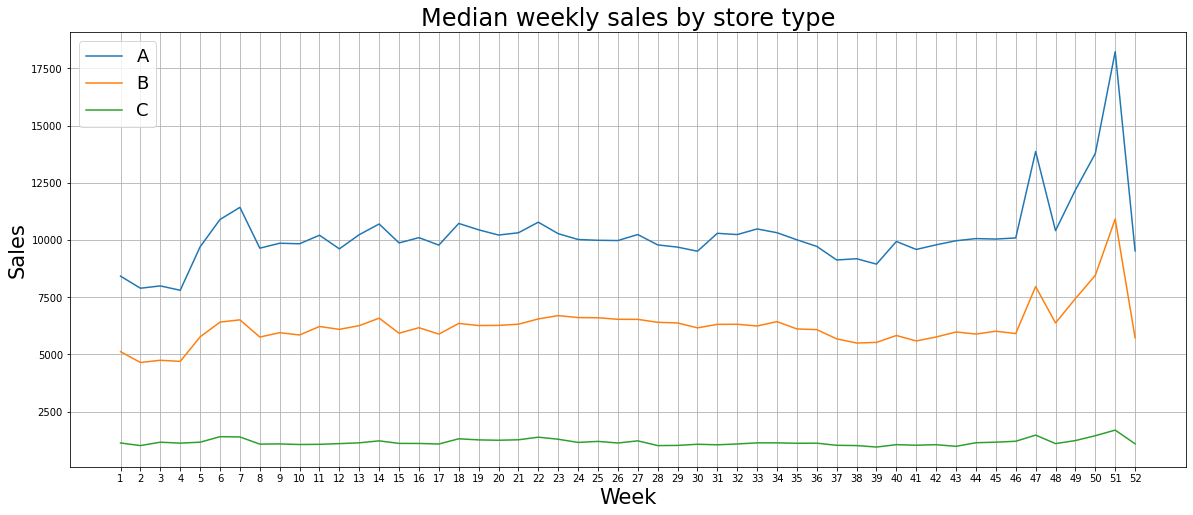

In [20]:
#Ploting the volume of weekly sales indicating the week the holiday occurs with a blue line
plotter('Weekly_Sales', 'Median weekly sales by store type', 'Sales')

Here we can make some interesting observations. Although type A and B stores reflect the sales patterns that we say at the overall level, type C is an exception where the sales don't peak very high even during christmas season. One possible reason could be that type C stores don't sell items that have higher demand during the christmas season. Or it could also be because these stores are located in areas/cities where there are no peak demand during the christmas season.

Let's also try to bring in another feature (sales/area) and see whether that can provide any further insights.

In [21]:
#creating a new (sales/area) feature
df['unit_sales'] = df['Weekly_Sales']/df['Size']

In [22]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,year,unit_sales
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010,0.164719
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6,2010,0.304263
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7,2010,0.274894
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,8,2010,0.128233
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,9,2010,0.144255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,39,2012,0.004300
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221,40,2012,0.005313
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221,41,2012,0.008975
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221,42,2012,0.006429


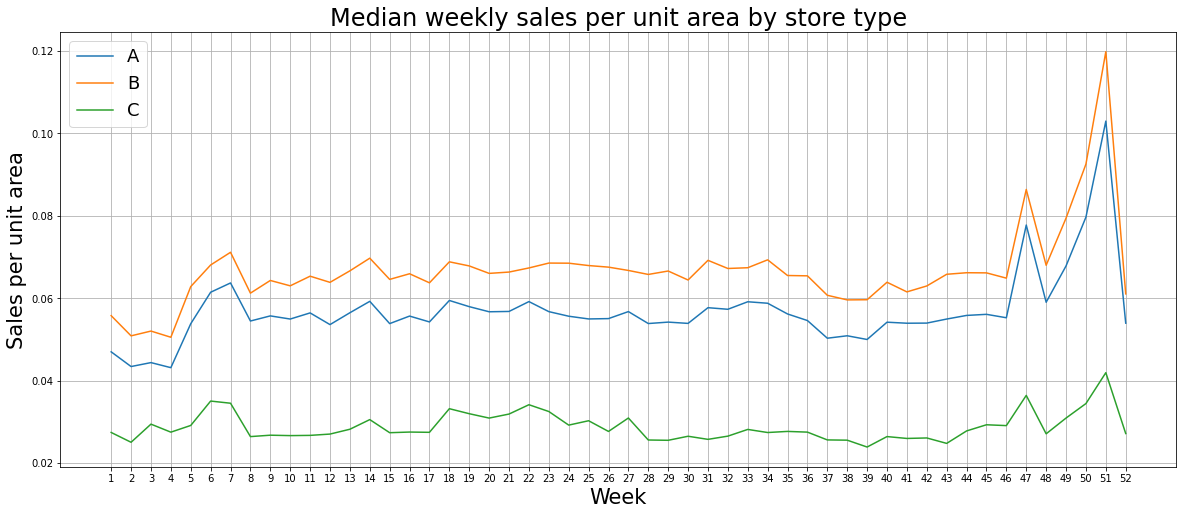

In [23]:
plotter('unit_sales', 'Median weekly sales per unit area by store type', 'Sales per unit area')

  
If we take sales per unit area into consideration, it is found that type B stores have much greater sales compared to the other two types. 
Moreover the graph depicting sales per unit area shows fluctuations throughout in the sales of type C stores whereas it is stable in the Weekly Sales graph

### FACTORS AFFECTING SALES

In [24]:
def corr_plotter(st_type=None):
    
    if st_type == None:
        corr = df.drop(['Store', 'Dept', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5','unit_sales'], axis=1).corr()
    else:
        df_new = df[df.Type==st_type]
        corr = df_new.drop(['Store', 'Dept', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'unit_sales'], axis=1).corr()

    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    f, ax = plt.subplots(figsize=(20, 15))

    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    if st_type == None:
        plt.title('Correlation matrix - Overall', fontsize=18)
    else:
        plt.title(f'Correlation matrix - Type {st_type}', fontsize=18)

    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    plt.show()

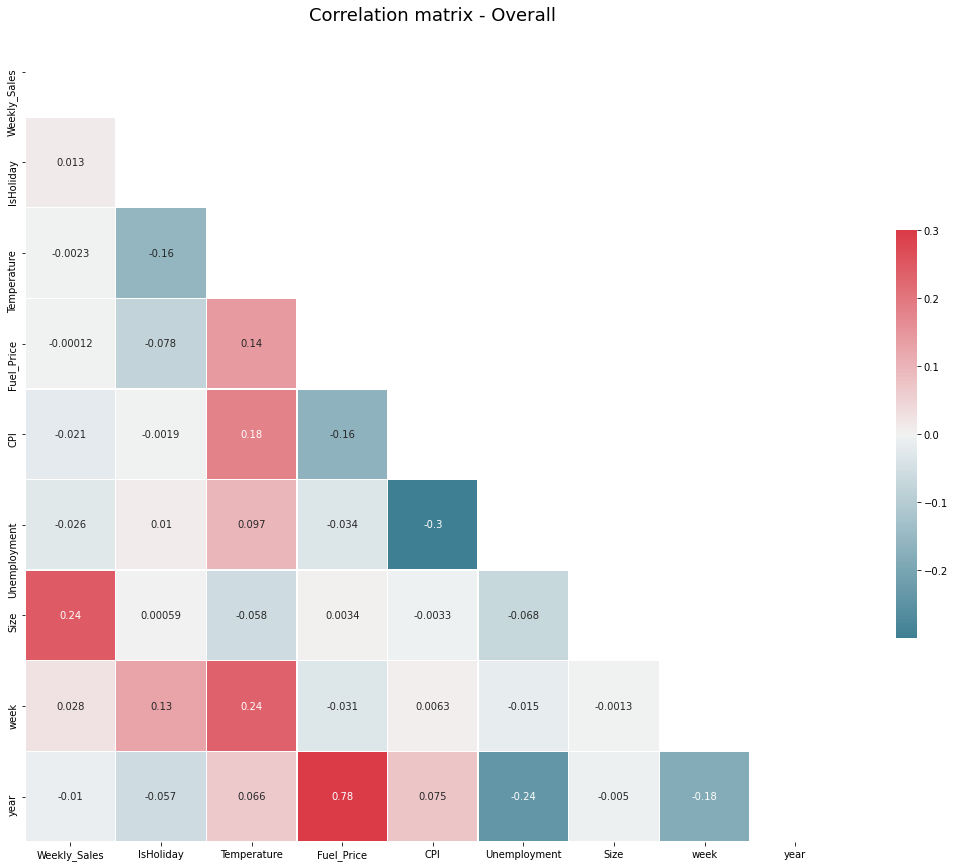

In [25]:
corr_plotter()

By analyzing the correlation matrix we can figure out the major interdependent factors  
Fuel price vs Year .78: This high correlation index can be explained by the increase in fuel prices over the years. However, looking at the price of fuel and weekly sales, we realized that even though the price of fuel has gone up over the years, weekly sales have not been impacted by this aspect (very close correlation to zero).

Store size vs Weekly Sales: A very relevant aspect of the weekly sales volume should be the size of the store. The larger the store, the greater the sales volume. However, this indicator shows us that this rule is not necessarily valid. That is, if the bigger the store, the bigger the sales volume, and this rule was always obeyed, we would observe a correlation coefficient between these two variables equal to 1.0. However, this value (0.24) indicates a moderate correlation, and that larger stores tend to sell more in most cases.


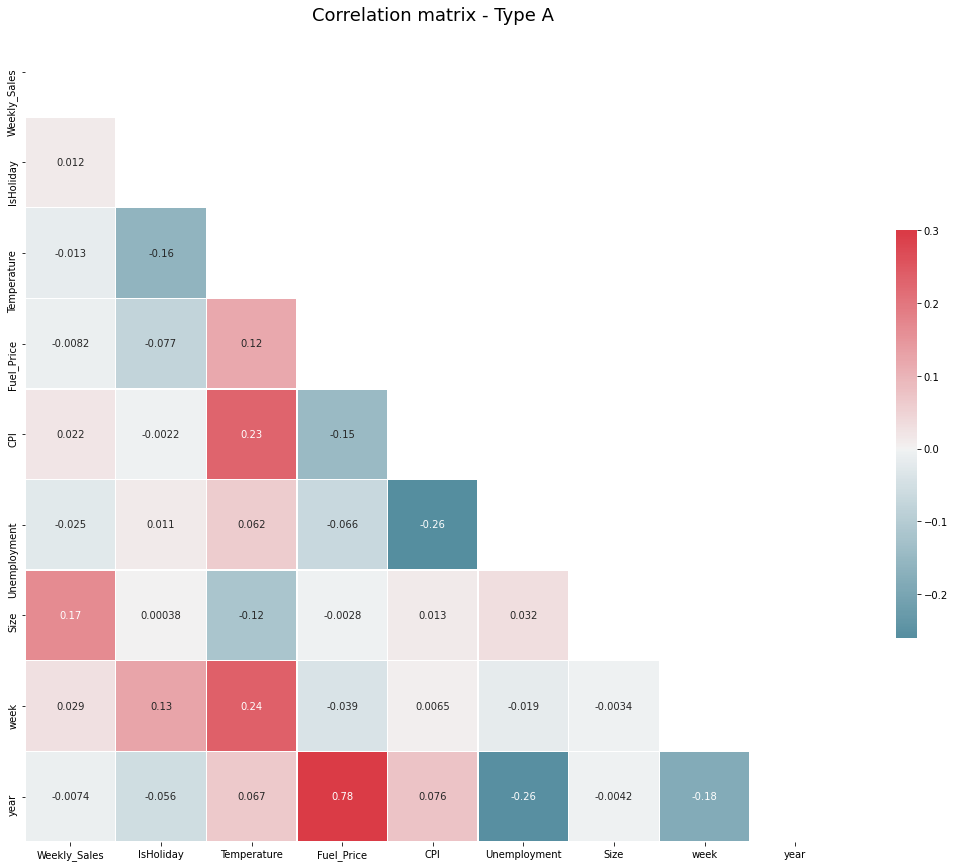

In [26]:
corr_plotter('A')

In the type A correlation matrix the weekly sales and size have correlation(.17) but when compared to the overall correlation with all stores(.24) it tends to be less.

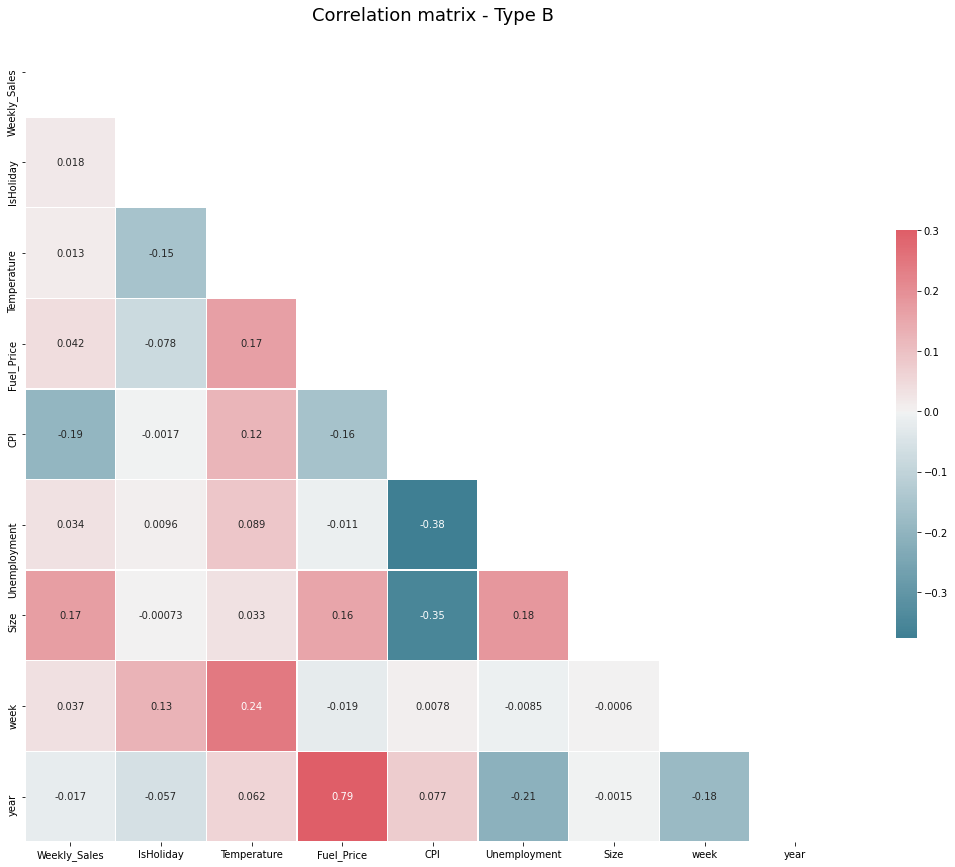

In [27]:
corr_plotter('B')

In the type B correlation matrix the weekly sales and size dependence is similar as type A.

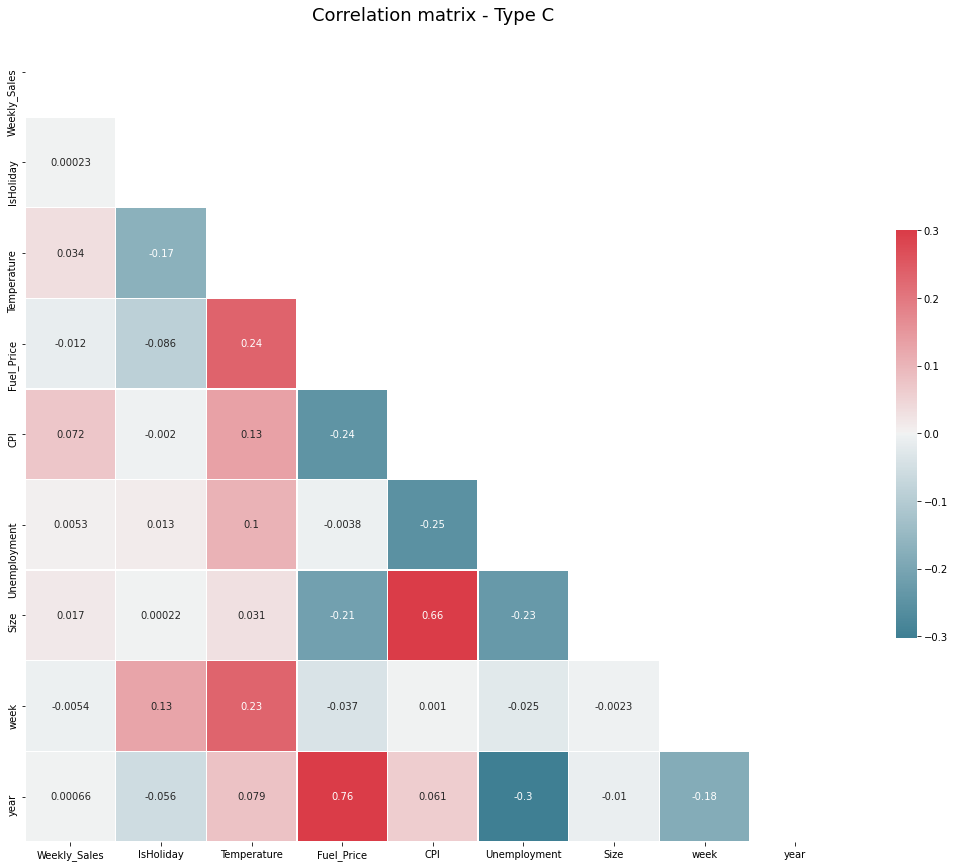

In [28]:
corr_plotter('C')

Interestingly the type C stores have quite small weekly sales and size correlation(0.017), differing from the other two store types. Also the CPI and size are significantly dependent for Type C stores alone(0.66) implying inflations effect on small stores. 

**Inference**

It is found that thee festive seasons show peak in sales and usually hit the lowest in the year end.  Sale is better when temperature is ambient and fuel price stable.
Among the factors that determine the weekly sales, size has proved to be a key factor. At the same time when  sales per unit area is being analysed,medium size stores have effectively larger sales. So we can conclude that type B stores(medium sized) are more remunerative than larger stores.
